In [68]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [69]:
image_path = 'aquarium_screenshot.png'
# image_path = 'validation\\fish\\fish70.png'
image_path = 'validation\\not_fish\\not_fish95.png'
image = cv2.imread(image_path)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image (convert to grayscale and apply edge detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Detect triangles in the image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
triangles = []

Detected 2 triangles.
lines_fishing_rod: [[[1084   60 1195   60]]

 [[ 444   60  555   60]]

 [[1305   60 1363   61]]]
len(lines_fishing_rod): 3


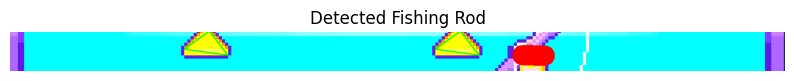

In [70]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for detecting yellow triangles (adjust as needed)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask for the yellow color
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Find contours in the masked image
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter and detect triangles
triangles = []
for contour in contours:
    epsilon = 0.05 * cv2.arcLength(contour, True)  # Adjusted epsilon for better approximation
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 3:
        triangles.append(approx)

# Draw triangles on the image
image_with_triangles = rgb.copy()
cv2.drawContours(image_with_triangles, triangles, -1, (0, 255, 0), 2)

# Check if triangles were detected
if not triangles:
    print("No triangles detected.")
else:
    print(f"Detected {len(triangles)} triangles.")



# Create a mask for the fishing rod color
mask_fishing_rod = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Apply edge detection on the fishing rod mask
edges_fishing_rod = cv2.Canny(mask_fishing_rod, 50, 150)

# Use Hough Line Transform to detect strait lines in the masked image
lines_fishing_rod = cv2.HoughLinesP(edges_fishing_rod, 1, np.pi / 180, 50, minLineLength=10, maxLineGap=10)

print(f"lines_fishing_rod: {lines_fishing_rod}")
print(f"len(lines_fishing_rod): {len(lines_fishing_rod)}")

if lines_fishing_rod is not None:
    for line in lines_fishing_rod:
        x1, y1, x2, y2 = line[0]


# Detect the shortest line in the image, which is the fishing rod
if lines_fishing_rod is not None:
    fishing_rod = min(lines_fishing_rod, key=lambda line: math.sqrt((line[0][0] - line[0][2])**2 + (line[0][1] - line[0][3])**2))[0]
    # fishing_rod = min(lines_fishing_rod, key=lambda line: max(line[0][1], line[0][3]))[0]
    x1, y1, x2, y2 = fishing_rod
    cv2.line(image_with_triangles, (x1, y1), (x2, y2), (255, 0, 0), 50)

    # Show the image with detected fishing rod
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_triangles)
    plt.title('Detected Fishing Rod')
    plt.axis('off')
    plt.show()



In [71]:
if lines_fishing_rod is not None and triangles:
    x1, _, x2, _ = fishing_rod
    min_distance = float('inf')
    for triangle in triangles:
        for point in triangle:
            x0, _ = point[0]
            distance = abs((x1 + x2) / 2 - x0)
            # distance = point_line_distance(x1, y1, x2, y2, x0, y0)
            print(f'distance: {distance}')
            if distance < min_distance:
                min_distance = distance
    print(f'Minimum distance between the fishing rod and the closest triangle: {min_distance}')
else:
    print('Could not detect either triangles or the fishing rod properly.')

distance: 250.0
distance: 139.0
distance: 187.0
distance: 890.0
distance: 779.0
distance: 827.0
Minimum distance between the fishing rod and the closest triangle: 139.0
